In [ ]:
%matplotlib inline


# NCL_conLev_1.py
This script illustrates the following concepts:
   - Specifying which contour levels will be drawn
   - Explicitly setting which contour levels will be labeled
   - Drawing contour lines over a cylindrical equidistant map
   - Zooming in on a particular area on a cylindrical equidistant map

See following URLs to see the reproduced NCL plot & script:
    - Original NCL script: https://www.ncl.ucar.edu/Applications/Scripts/conLev_1.ncl
    - Original NCL plot: https://www.ncl.ucar.edu/Applications/Images/conLev_1_lg.png


Import packages:



In [1]:
import numpy as np
import xarray as xr
from cartopy.mpl.gridliner import LatitudeFormatter, LongitudeFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

import geocat.datafiles as gdf
import geocat.viz as gv

C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Read in data:



In [18]:
ds = xr.open_dataset('C:/ERSSTv5/ERA5_wind_850hpa_active_inactive_diff.nc')
#ds
#ds.data_vars
u=ds.u
v=ds.v

AttributeError: 'DataArray' object has no attribute 'reshape'

Plot:



ValueError: DataArray must be 2d

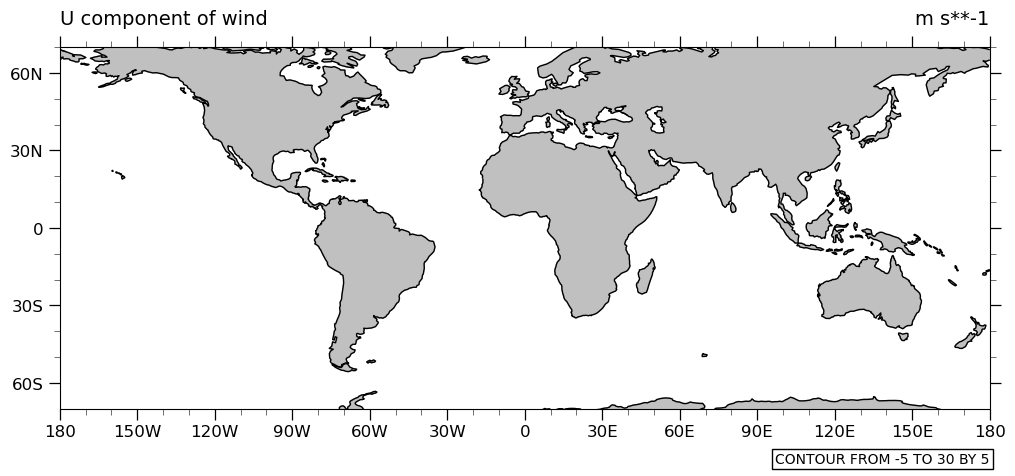

In [17]:
# Generate figure (set its size (width, height) in inches)
plt.figure(figsize=(12, 6))

# Generate axes using Cartopy projection
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
ax.set_extent([-180, 180, -70, 70], crs=projection)

# Draw land
ax.add_feature(cfeature.LAND, color='silver')

# Use geocat.viz.util convenience function to set axes tick values
gv.set_axes_limits_and_ticks(ax,
                             xticks=np.linspace(-180, 180, 13),
                             yticks=np.linspace(-60, 60, 5))

# Use geocat.viz.util convenience function to make latitude, longitude tick labels
gv.add_lat_lon_ticklabels(ax)
# Removing degree symbol from tick labels to more closely resemble NCL example
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))
ax.coastlines()
# Use geocat.viz.util convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax, labelsize=12)

# Use geocat.viz.util convenience function to add titles
gv.set_titles_and_labels(ax,
                         lefttitle=u.long_name,
                         righttitle=u.units,
                         lefttitlefontsize=14,
                         righttitlefontsize=14)

# Add lower text box
ax.text(1,
        -0.15,
        "CONTOUR FROM -5 TO 30 BY 5",
        horizontalalignment='right',
        transform=ax.transAxes,
        bbox=dict(boxstyle='square, pad=0.25',
                  facecolor='white',
                  edgecolor='black'))

# Specify which contour levels to draw
contour_lev = np.arange(-0.4, 0.6, 0.1)
# Specify which contour lines to label. Where the labels appear on the contours
# is handeled by xarray.plot.contour(). The keyword manual can be used to
# set exactly where the labels will be drawn.
labels = np.linspace(0, 20, 3)
# Plot contour lines
contour = u.plot.contour(ax=ax,
                            transform=ccrs.PlateCarree(),
                            vmin=-5,
                            vmax=30,
                            levels=contour_lev,
                            colors='black',
                            linestyles='solid',
                            linewidths=0.5,
                            add_labels=False)
ax.clabel(contour, labels, fmt='%d', inline=True, fontsize=10)
plt.show()